In [1]:
import numpy as np
import pandas as pd
import statsmodels
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint, adfuller

import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
import plotly
from pandas_datareader import data as pdr
import datetime
import yfinance as yf
yf.pdr_override()

In [33]:
start = datetime.datetime(2010, 1, 1)
end = datetime.datetime(2022, 1, 1)

tickers = ['AAPL', 'ADBE', 'ORCL', 'MS', 'MSFT', 'NVDA','GOOGL','AMZN','GS','LLY']


df = pdr.get_data_yahoo(tickers, start, end)['Close']

[*********************100%***********************]  10 of 10 completed


In [34]:
df1 = round(df,3)

In [35]:
def find_cointegrated_pairs(data):
    
    keys = list(data.keys())
    n = len(keys)
    
    score_matrix = np.zeros((n, n))
    pvalue_matrix = np.ones((n, n)) 
    pairs = []
    
    for i in range(n):
        for j in range(i+1, n):
            
            S1 = data[keys[i]] 
            S2 = data[keys[j]]
            
            result = coint(S1, S2)
            
            score_matrix[i, j] = result[0]
            pvalue_matrix[i, j] = result[1]
            
            if result[1] < 0.05:
                pairs.append((keys[i], keys[j]))
                
    return score_matrix, pvalue_matrix, pairs

In [88]:
scores, pvalues, pairs = find_cointegrated_pairs(df)
print(pairs)

[('AAPL', 'LLY'), ('ADBE', 'AMZN'), ('GOOGL', 'LLY'), ('GOOGL', 'ORCL'), ('GS', 'MS'), ('LLY', 'MSFT'), ('LLY', 'ORCL'), ('MS', 'ORCL')]


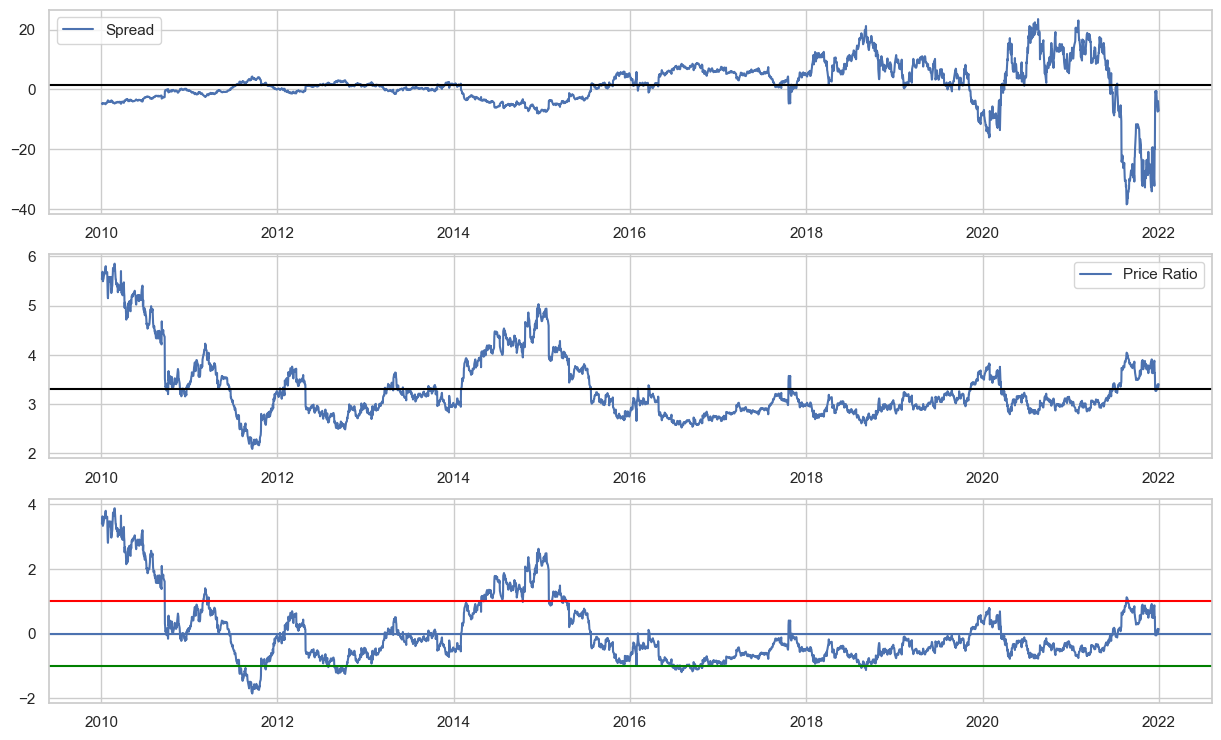

In [59]:
S1 = df['ADBE']
S2 = df['AMZN']

##SPREADS

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1['ADBE']
b = results.params['ADBE']

spread = S2 - b * S1

##RATIOS

ratio = S1/S2

##Standardizing Ratio - Using Z-score

def zscore(series):
    return (series - series.mean()) / np.std(series)

# Create the three graphs.
fig, axs = plt.subplots(3, 1, figsize=(15, 9))
axs[0].plot(spread)
axs[0].axhline(spread.mean(), color='black')
axs[0].legend(['Spread'])
axs[1].plot(ratio)
axs[1].axhline(ratio.mean(), color='black')
axs[1].legend(['Price Ratio'])
axs[2].plot(zscore(ratio))
axs[2].axhline(zscore(ratio).mean())
axs[2].axhline(1.0, color='red')
axs[2].axhline(-1.0, color='green')

# Show the graphs.
plt.show()

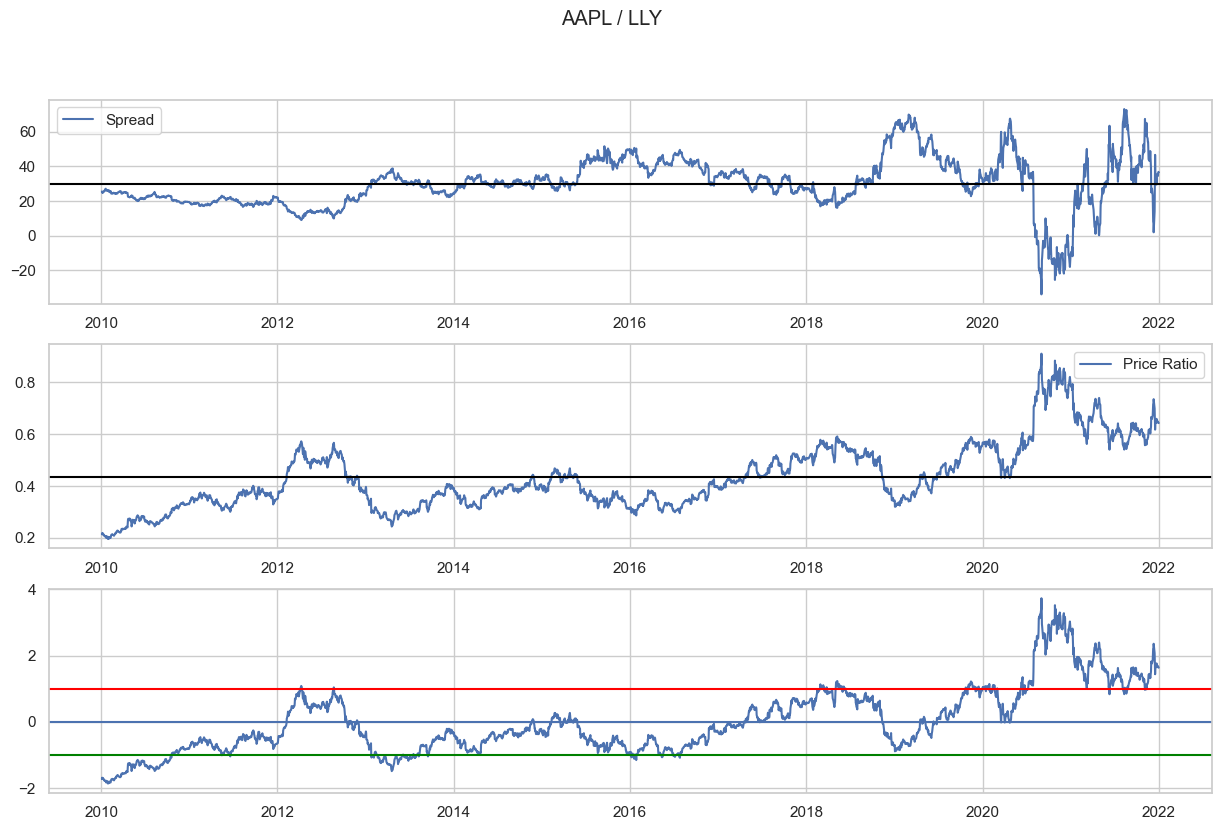

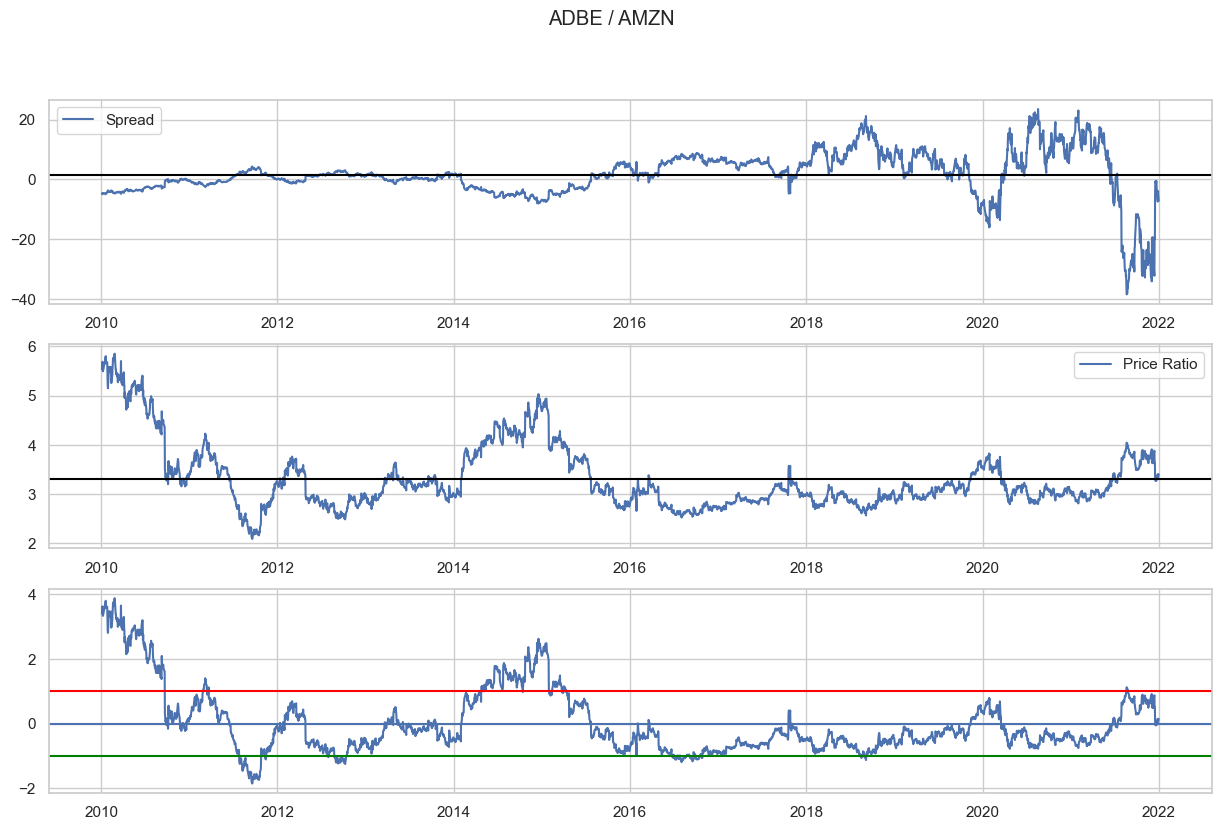

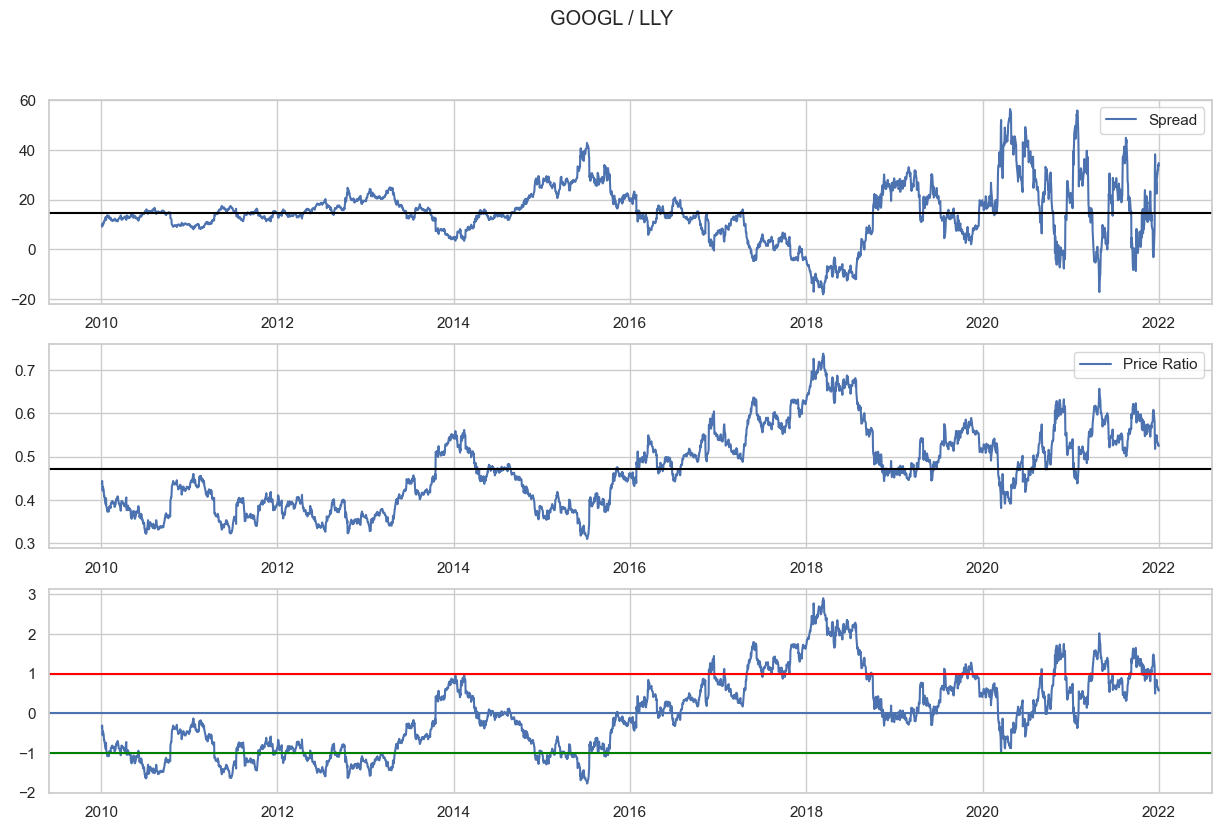

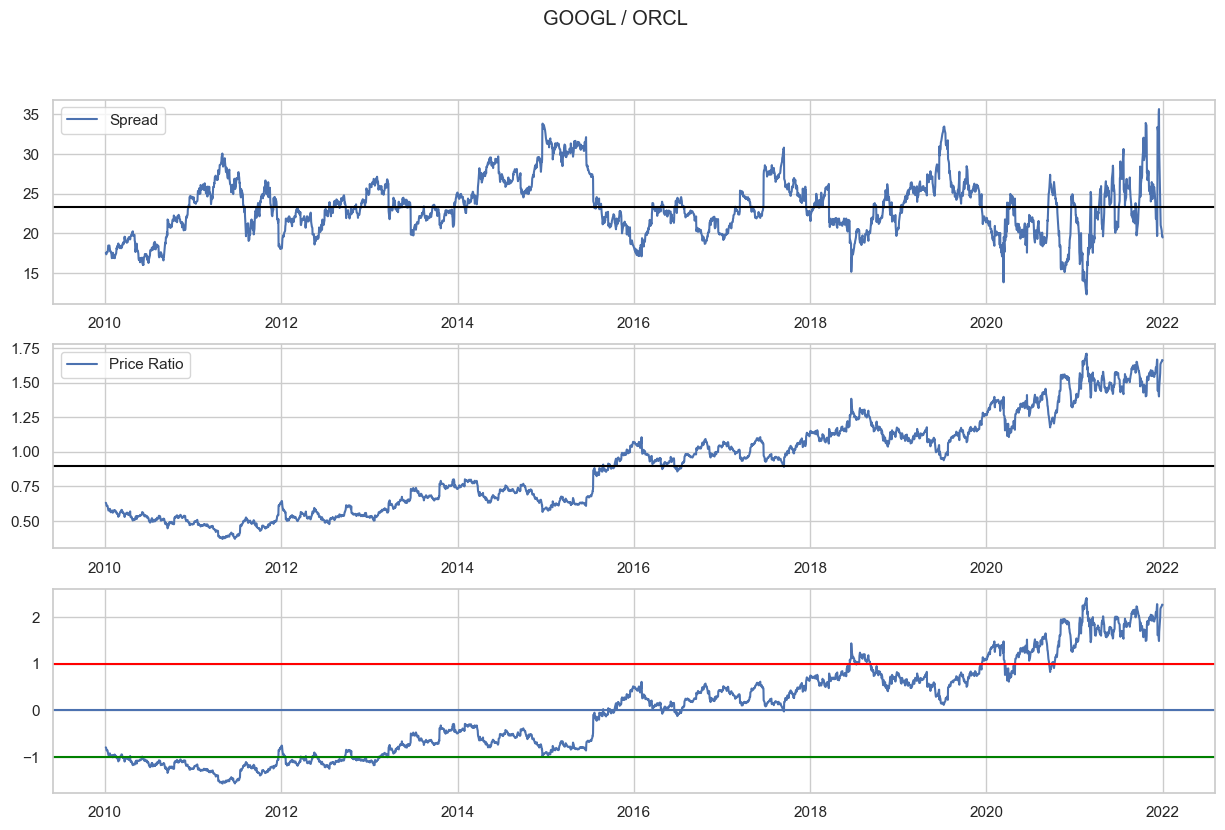

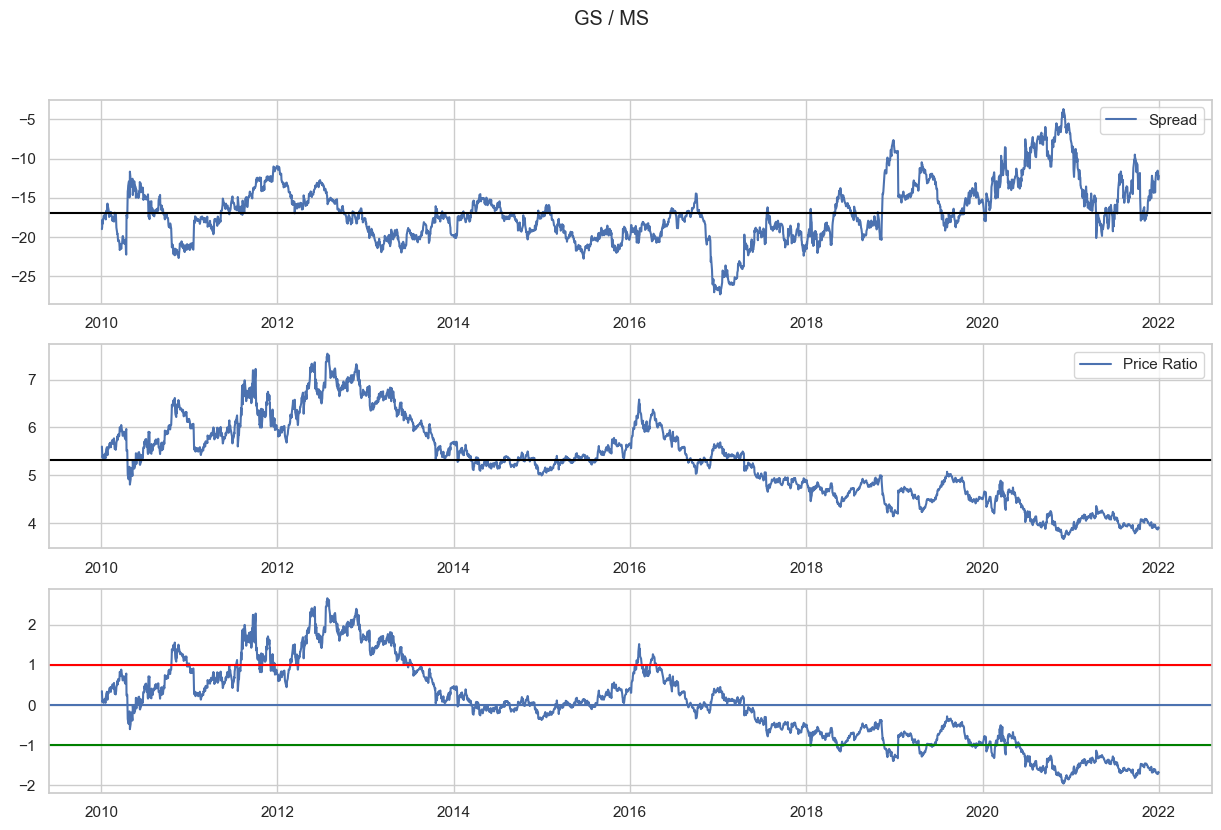

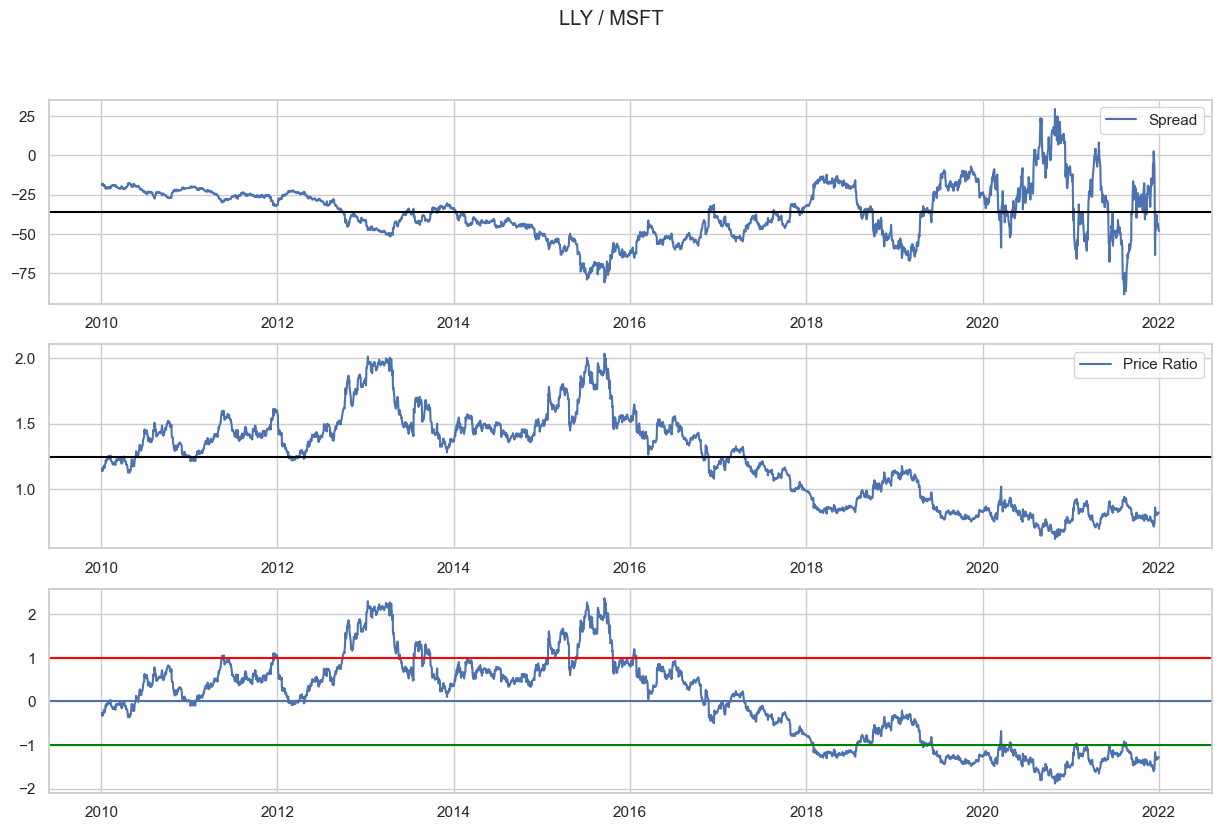

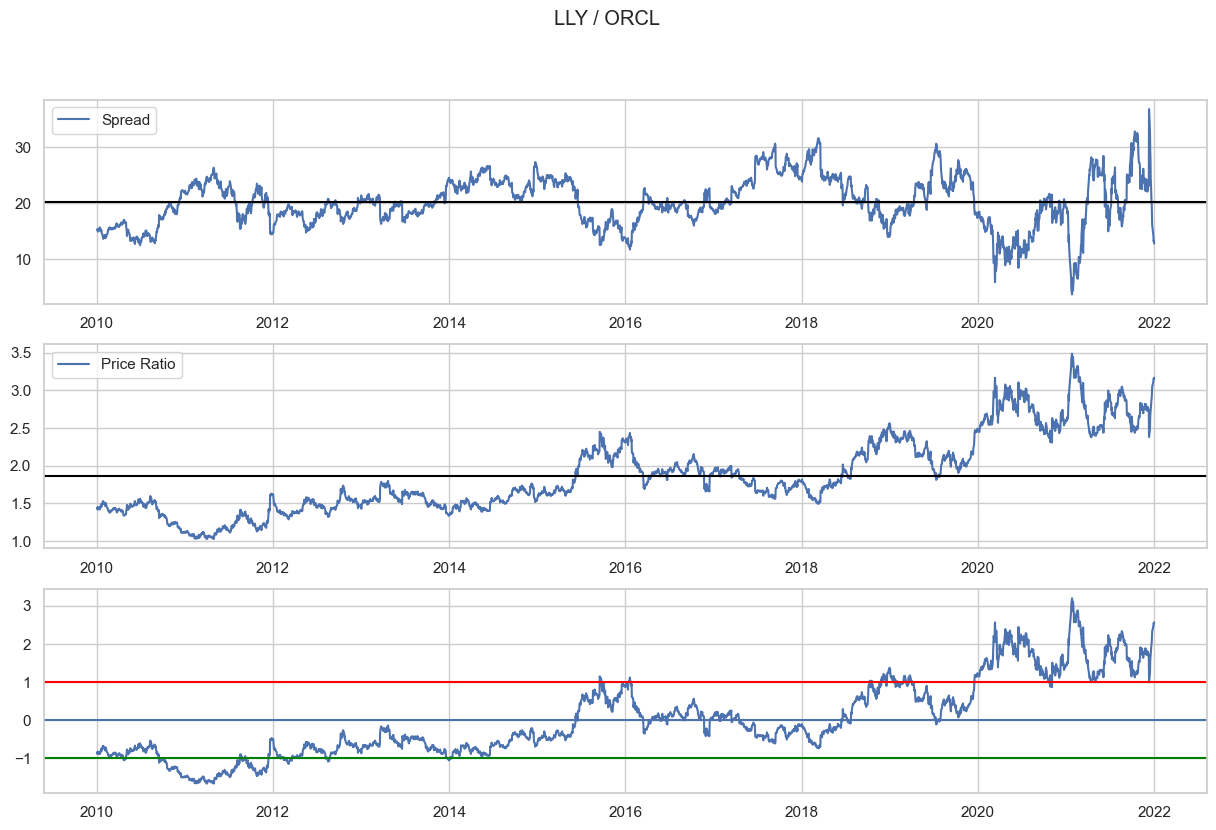

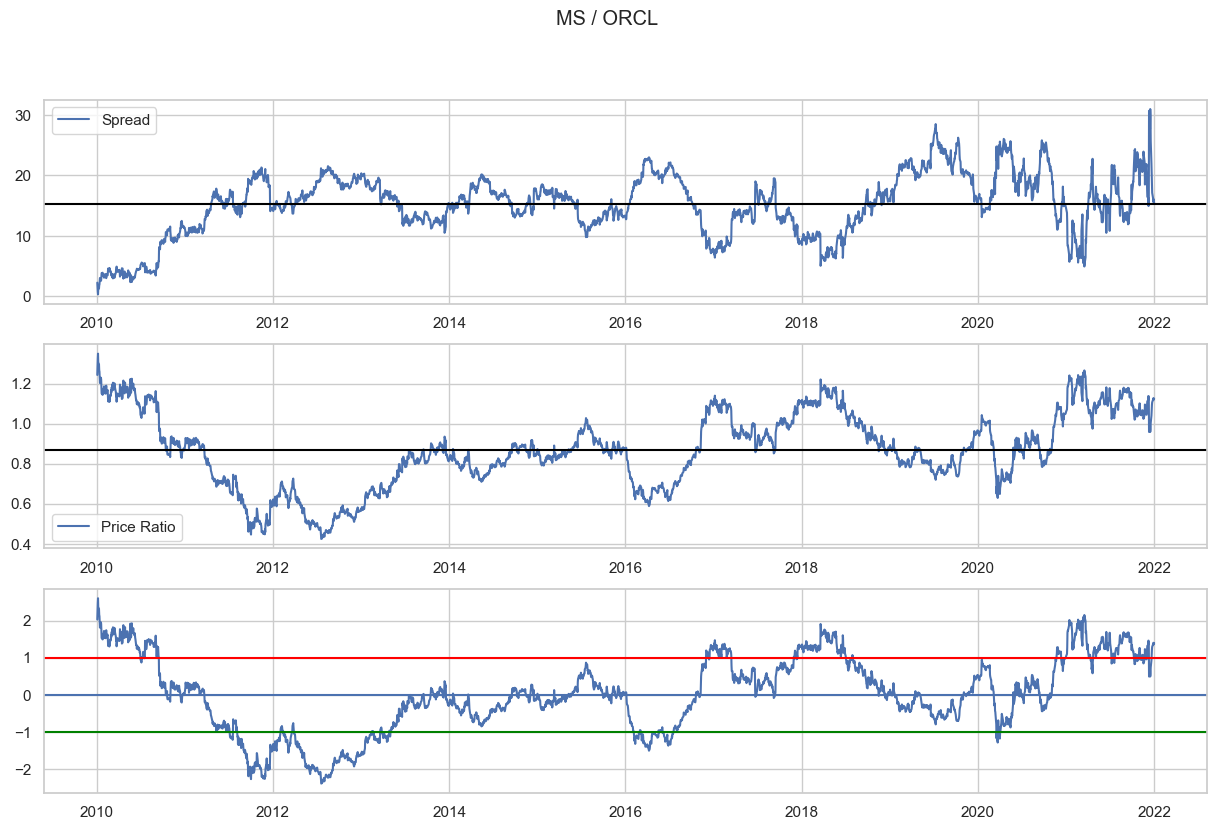

In [85]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

for pair in pairs:
    S1 = df[pair[0]] 
    S2 = df[pair[1]]

    # Calculate spread
    S1 = sm.add_constant(S1)
    results = sm.OLS(S2, S1).fit()
    S1 = S1[pair[0]]
    b = results.params[pair[0]]
    spread = S2 - b * S1

    # Calculate ratio
    ratio = S1/S2

    # Standardize ratio
    ratio_zscore = zscore(ratio)

    # Create plots
    fig, axs = plt.subplots(3, 1, figsize=(15, 9))

    axs[0].plot(spread)
    axs[0].axhline(spread.mean(), color='black')
    axs[0].legend(['Spread'])

    axs[1].plot(ratio) 
    axs[1].axhline(ratio.mean(), color='black')
    axs[1].legend(['Price Ratio'])

    axs[2].plot(ratio_zscore)
    axs[2].axhline(ratio_zscore.mean())
    axs[2].axhline(1.0, color='red')
    axs[2].axhline(-1.0, color='green')

    plt.suptitle(f"{pair[0]} / {pair[1]}") 
    plt.show()

In [76]:
S1 = df['ADBE']
S2 = df['AMZN']

ratios = S1 / S2
val = print(len(ratios) * .70 ) 

train = ratios[:val]
test = ratios[val:]

2114.7


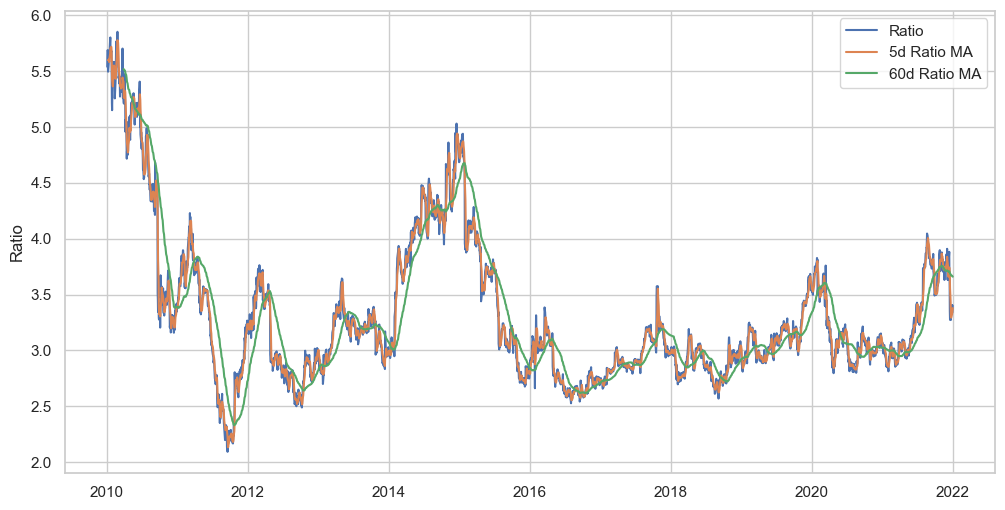

In [77]:
ratios_mavg5 = train.rolling(window=5, center=False).mean()
ratios_mavg60 = train.rolling(window=60, center=False).mean()
std_60 = train.rolling(window=60, center=False).std()
zscore_60_5 = (ratios_mavg5 - ratios_mavg60)/std_60
plt.figure(figsize=(12, 6))
plt.plot(train.index, train.values)
plt.plot(ratios_mavg5.index, ratios_mavg5.values)
plt.plot(ratios_mavg60.index, ratios_mavg60.values)
plt.legend(['Ratio', '5d Ratio MA', '60d Ratio MA'])

plt.ylabel('Ratio')
plt.show()

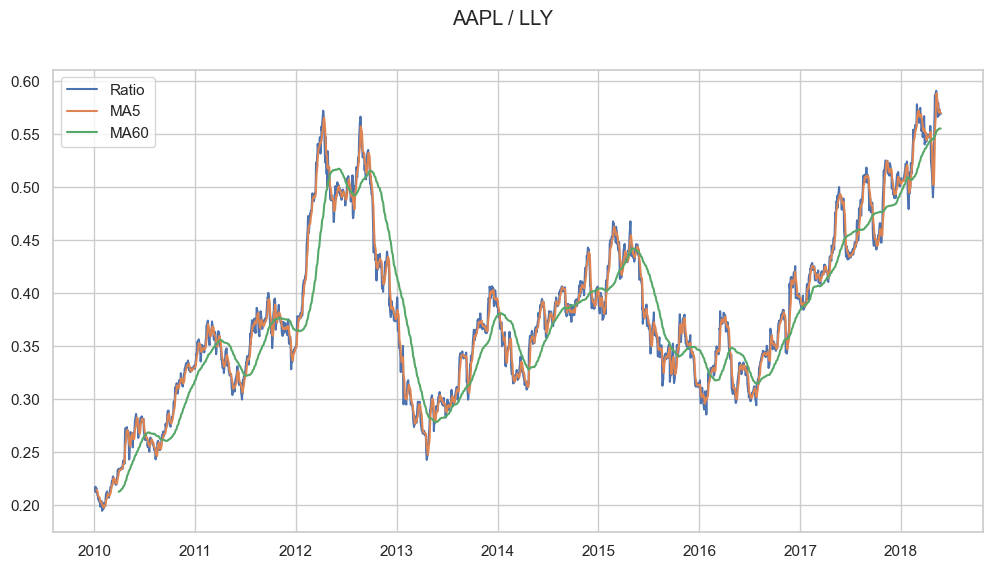

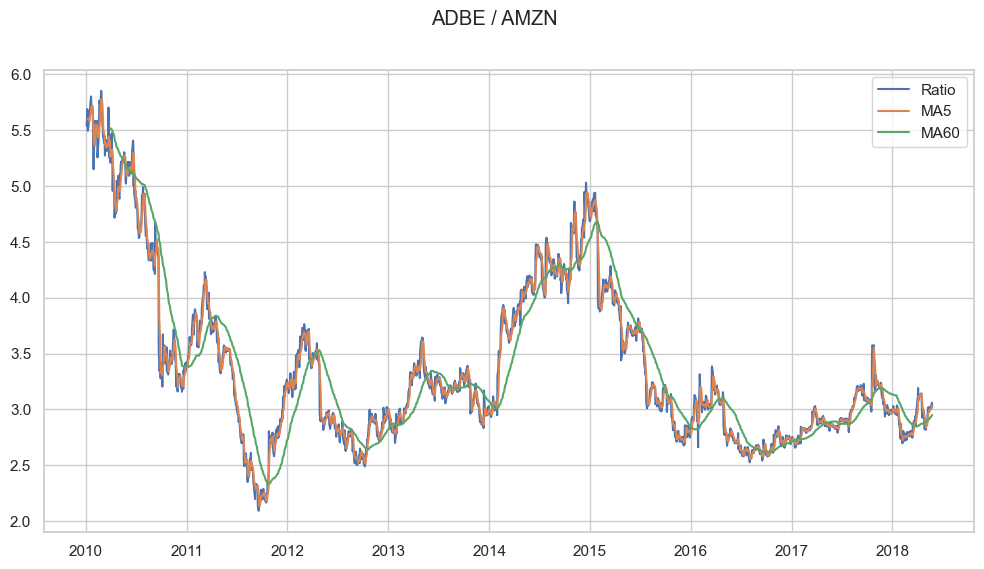

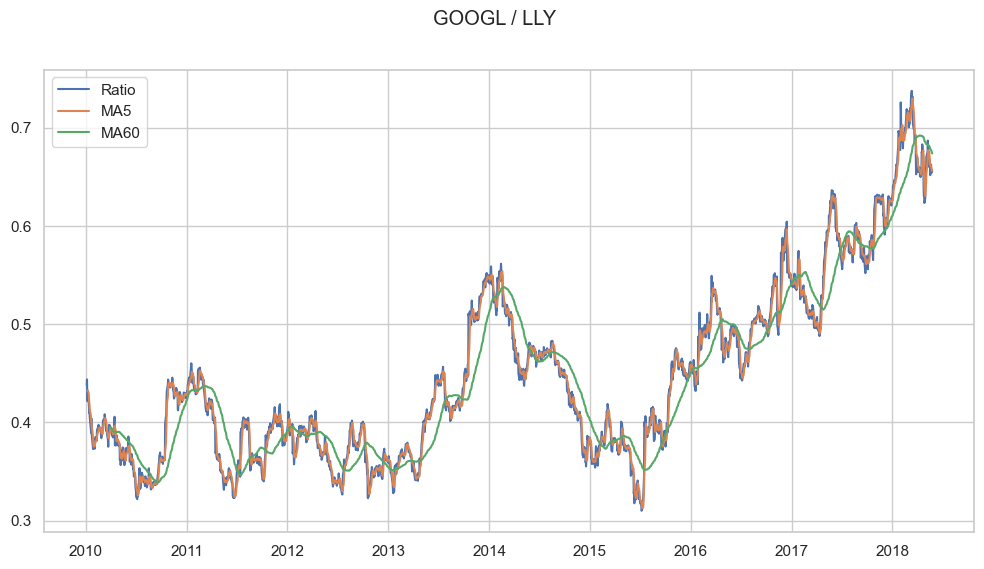

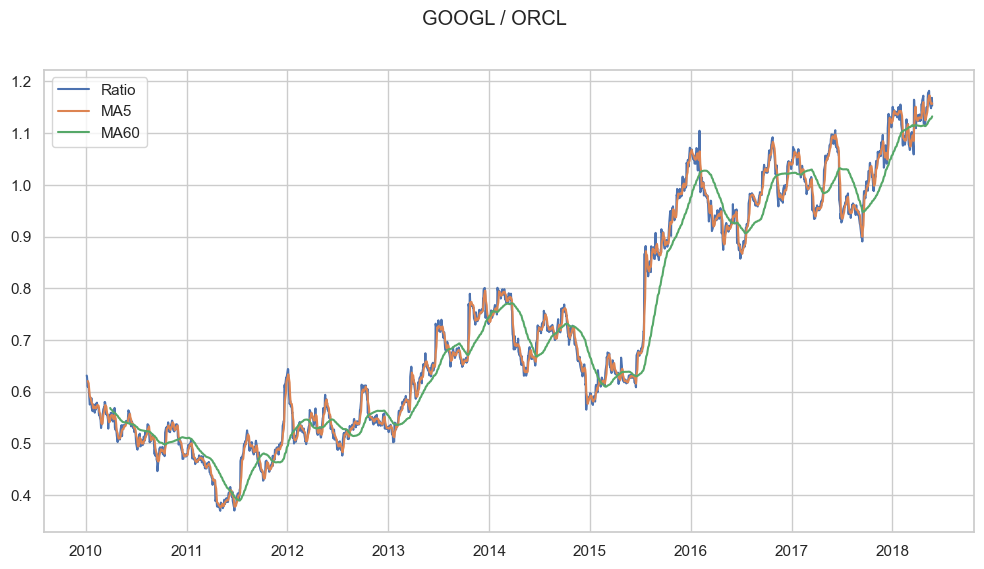

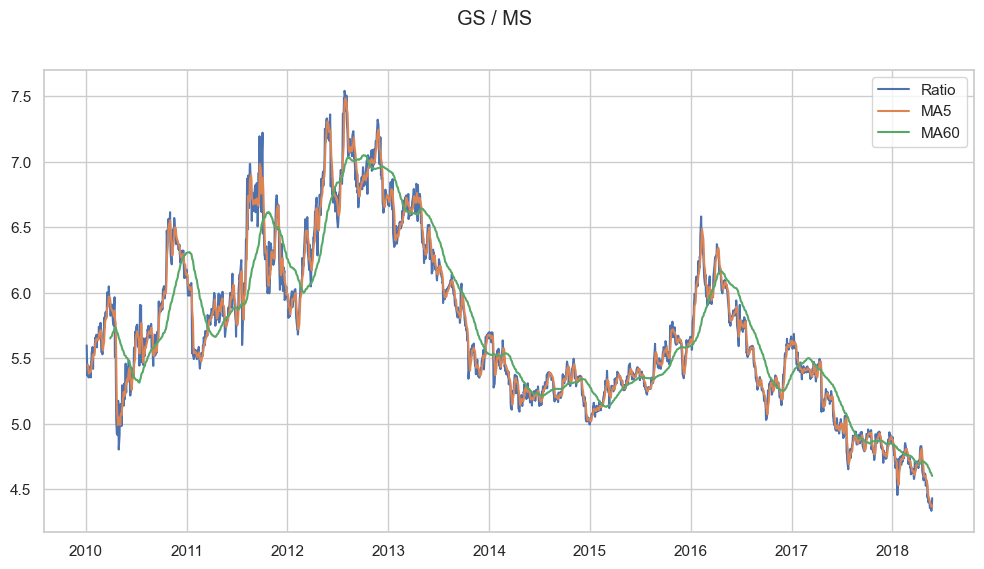

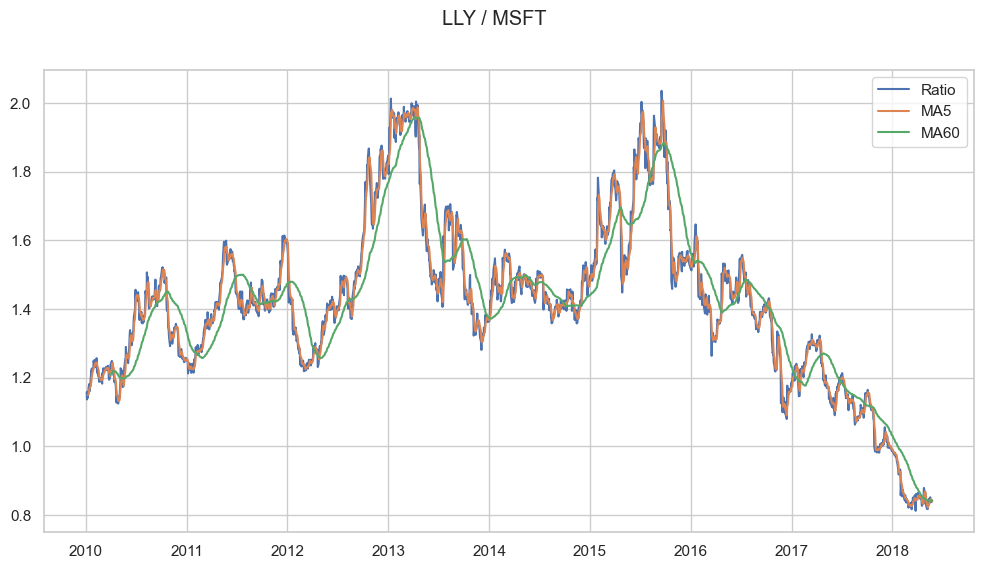

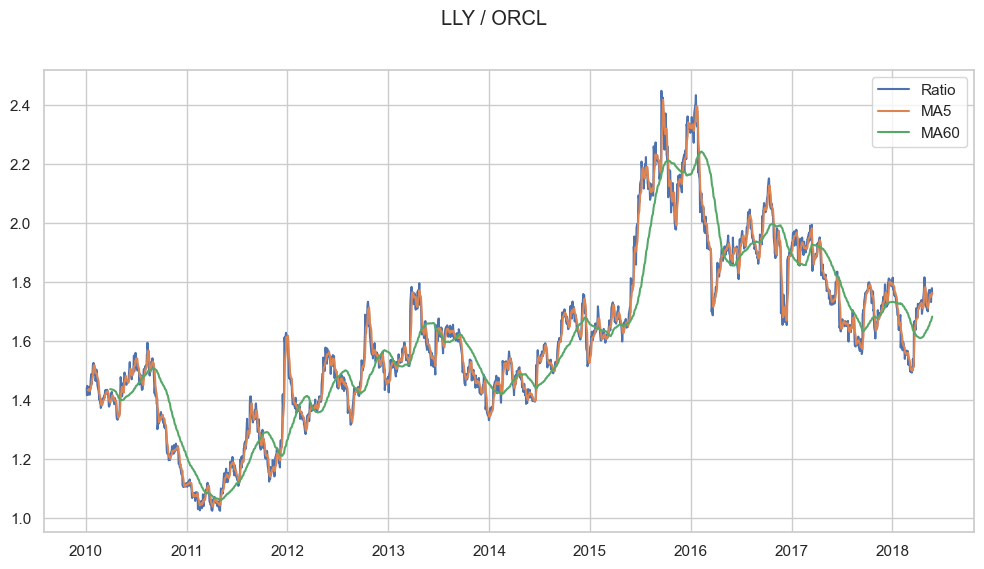

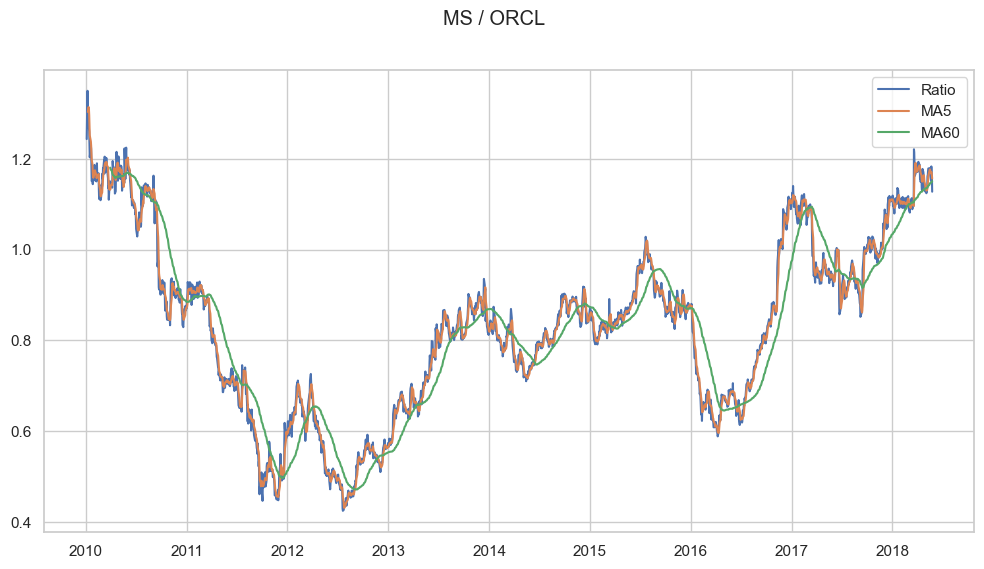

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

for ticker1, ticker2 in pairs:

    # Extract prices
    prices1 = df[ticker1] 
    prices2 = df[ticker2]

    # Calculate ratio
    ratios = prices1 / prices2  

    # Split into train/test
    split_idx = int(len(ratios) * 0.7)
    train = ratios[:split_idx]
    test = ratios[split_idx:]

    # Calculate rolling stats
    mavg5 = train.rolling(5).mean()
    mavg60 = train.rolling(60).mean()
    stddev = train.rolling(60).std()

    zscore = (mavg5 - mavg60) / stddev

    # Plot
    plt.figure(figsize=(12,6))
    plt.plot(train, label='Ratio')
    plt.plot(mavg5, label='MA5')
    plt.plot(mavg60, label='MA60')
    plt.legend()
    plt.suptitle(f'{ticker1} / {ticker2}')
    plt.show()

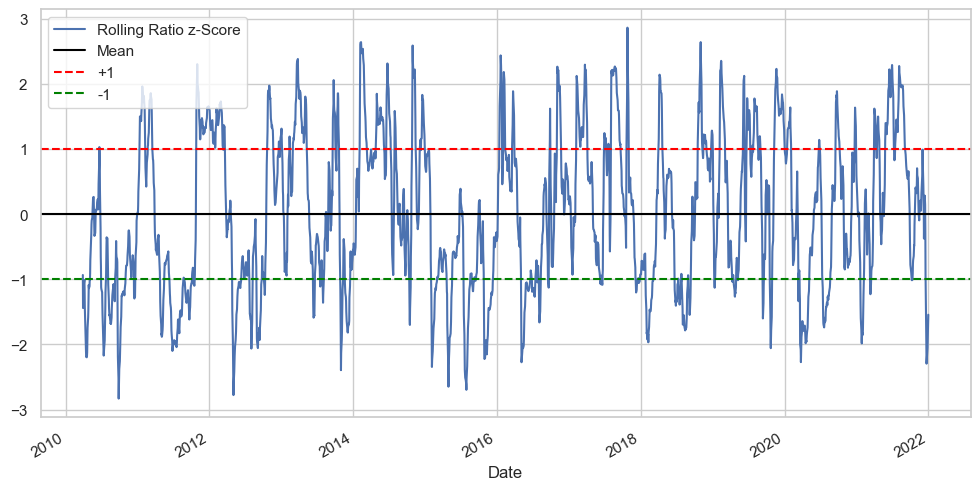

In [79]:
plt.figure(figsize=(12,6))
zscore_60_5.plot()
plt.axhline(0, color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Rolling Ratio z-Score', 'Mean', '+1', '-1'])
plt.show()

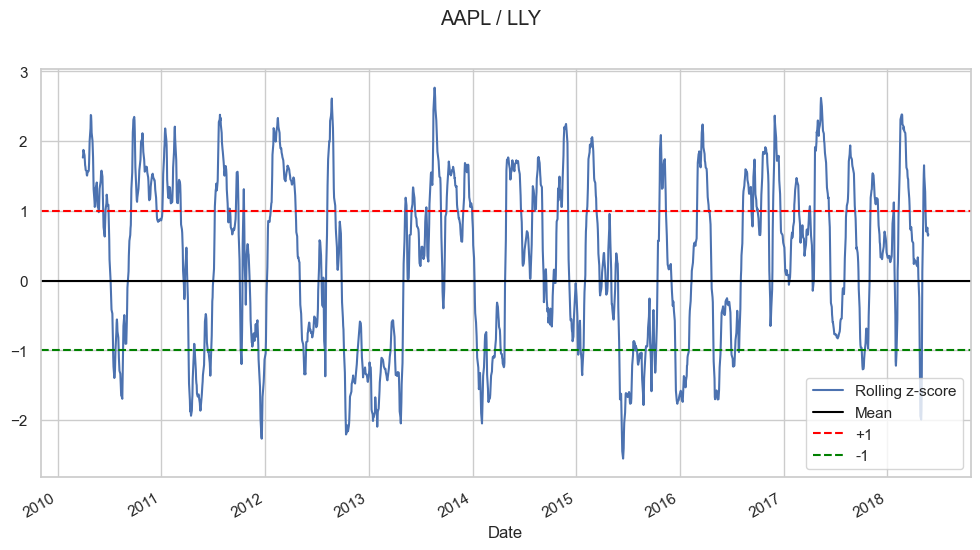

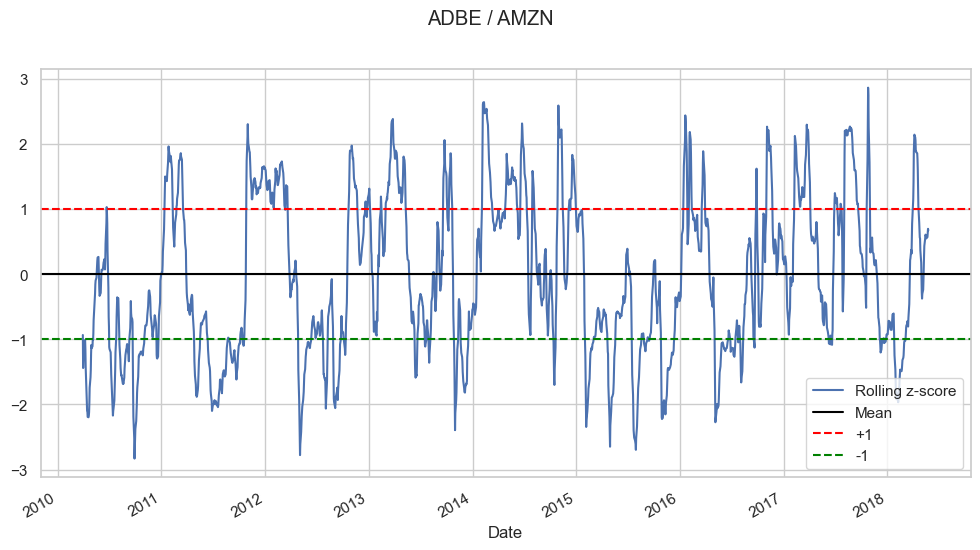

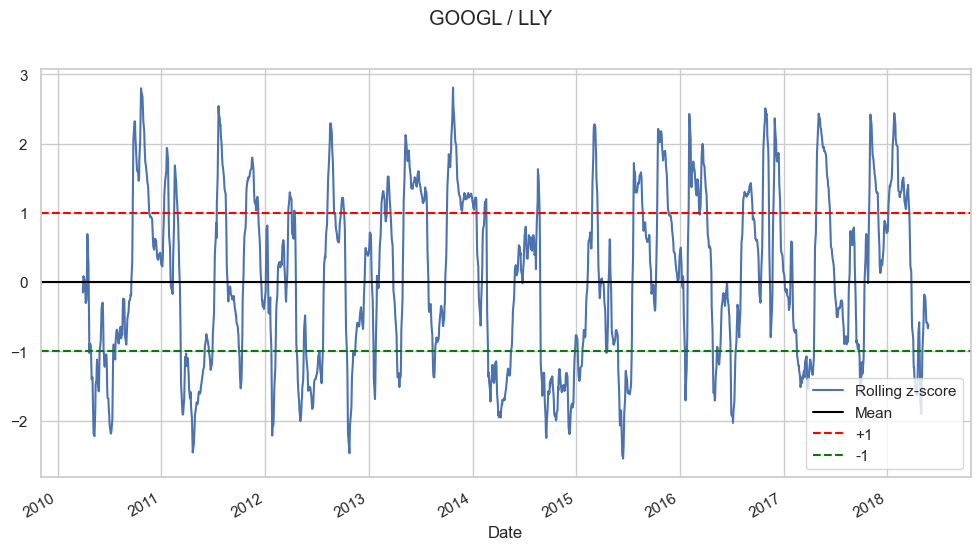

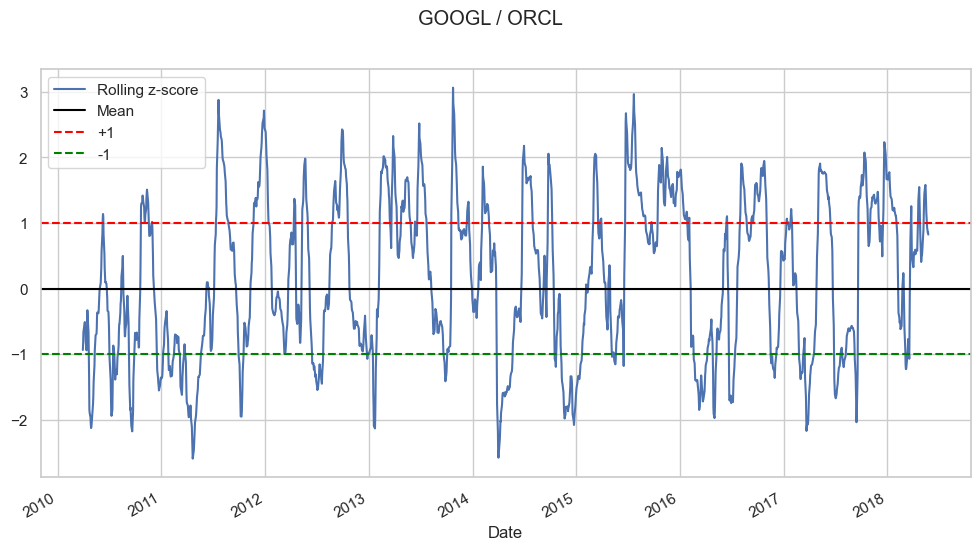

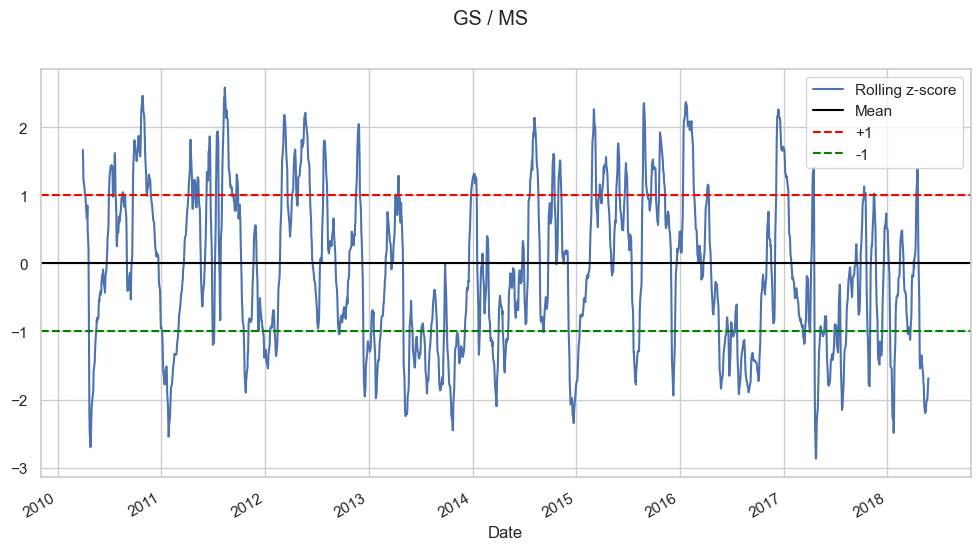

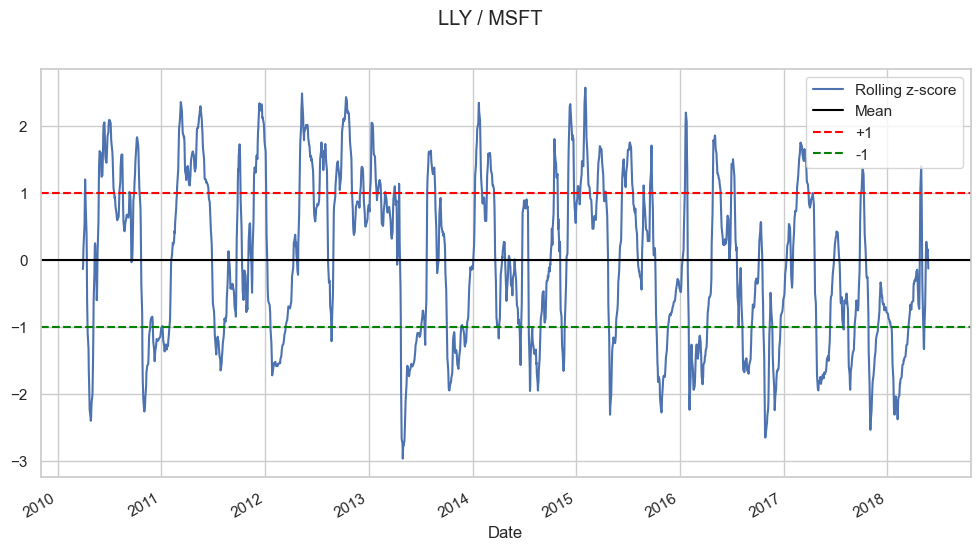

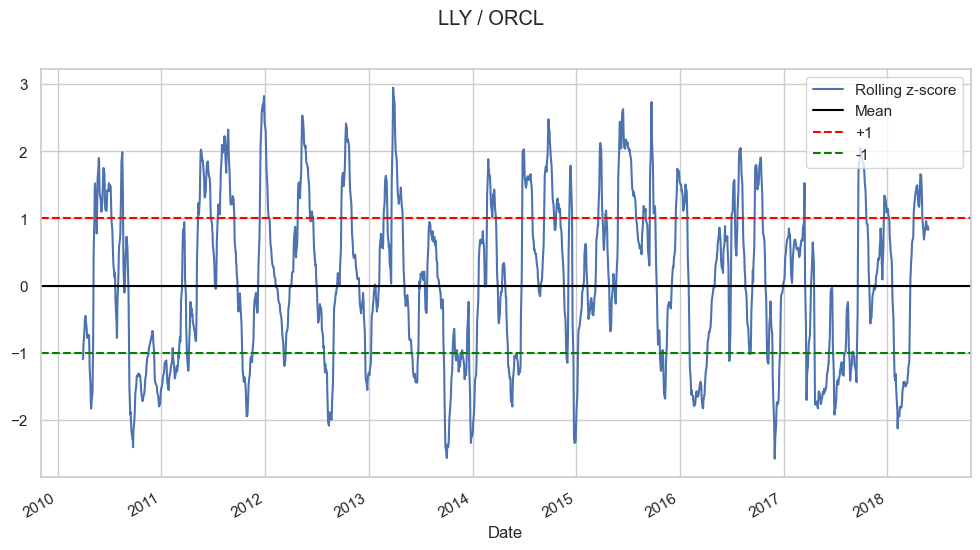

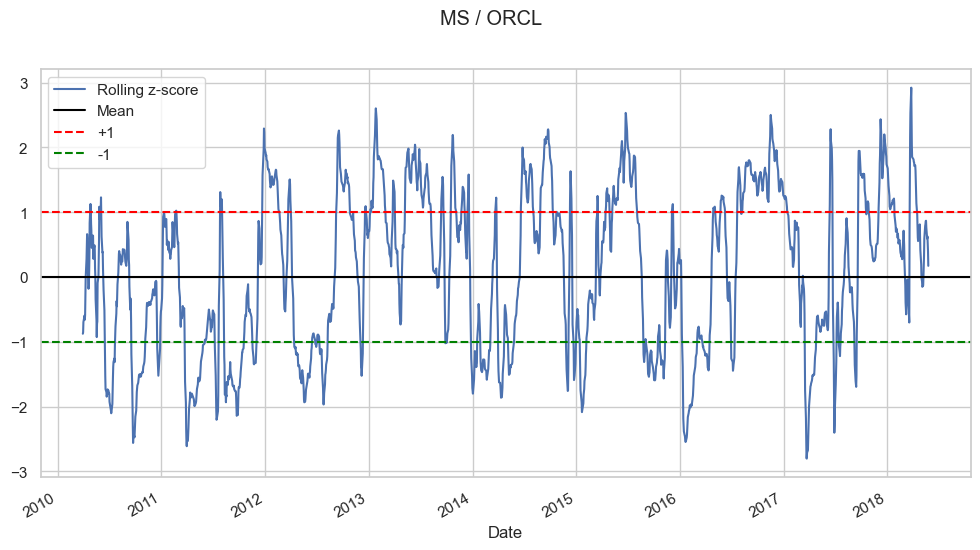

In [89]:
import pandas as pd 
import matplotlib.pyplot as plt


for ticker1, ticker2 in pairs:

  # Extract prices
  prices1 = df[ticker1]
  prices2 = df[ticker2]
  
  # Calculate ratio
  ratios = prices1 / prices2

  # Split into train/test 
  split_idx = int(len(ratios) * 0.7)
  train = ratios[:split_idx]
  test = ratios[split_idx:]

  # Calculate rolling z-score
  mavg5 = train.rolling(5).mean()
  mavg60 = train.rolling(60).mean()
  stddev = train.rolling(60).std()

  zscore = (mavg5 - mavg60) / stddev

  # Plot
  plt.figure(figsize=(12,6))

  zscore.plot()

  plt.axhline(0, color='black')
  plt.axhline(1, color='red', linestyle='--')
  plt.axhline(-1, color='green', linestyle='--')

  plt.legend(['Rolling z-score', 'Mean', '+1', '-1'])
  
  plt.suptitle(f'{ticker1} / {ticker2}')
  
  plt.show()

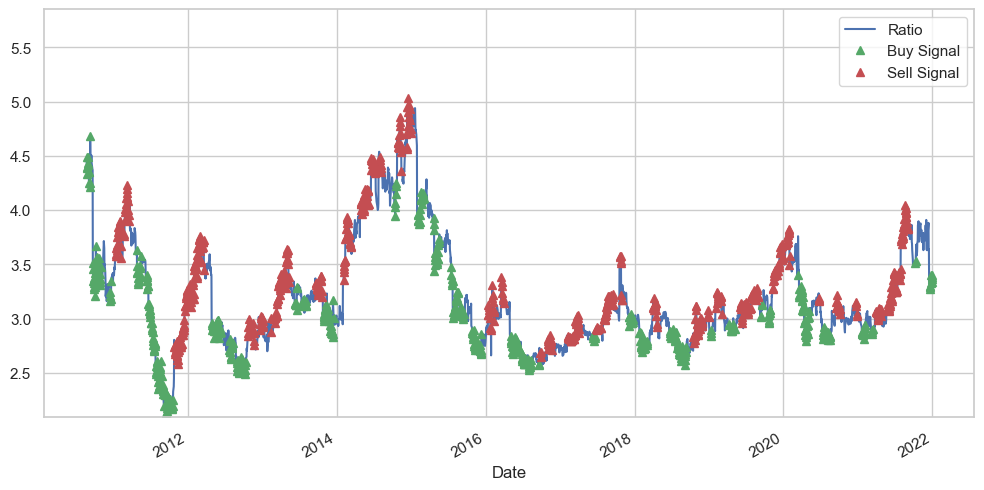

In [80]:
plt.figure(figsize=(12,6))

train[160:].plot()
buy = train.copy()
sell = train.copy()
buy[zscore_60_5>-1] = 0
sell[zscore_60_5<1] = 0
buy[160:].plot(color='g', linestyle='None', marker='^')
sell[160:].plot(color='r', linestyle='None', marker='^')
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, ratios.min(), ratios.max()))
plt.legend(['Ratio', 'Buy Signal', 'Sell Signal'])
plt.show()

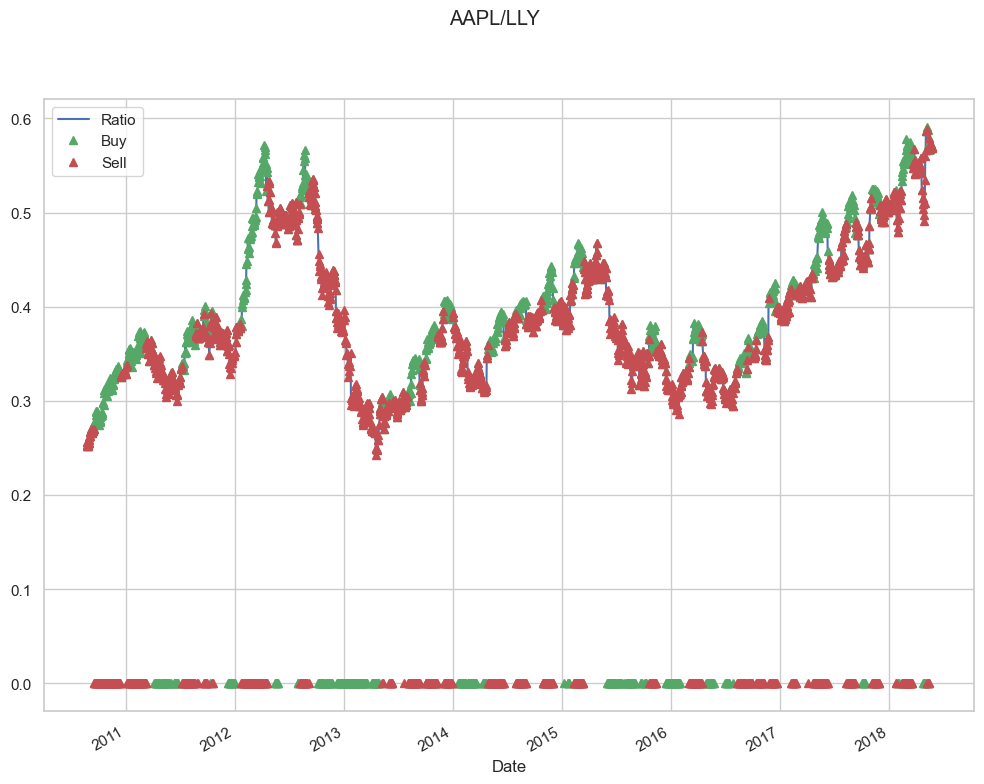

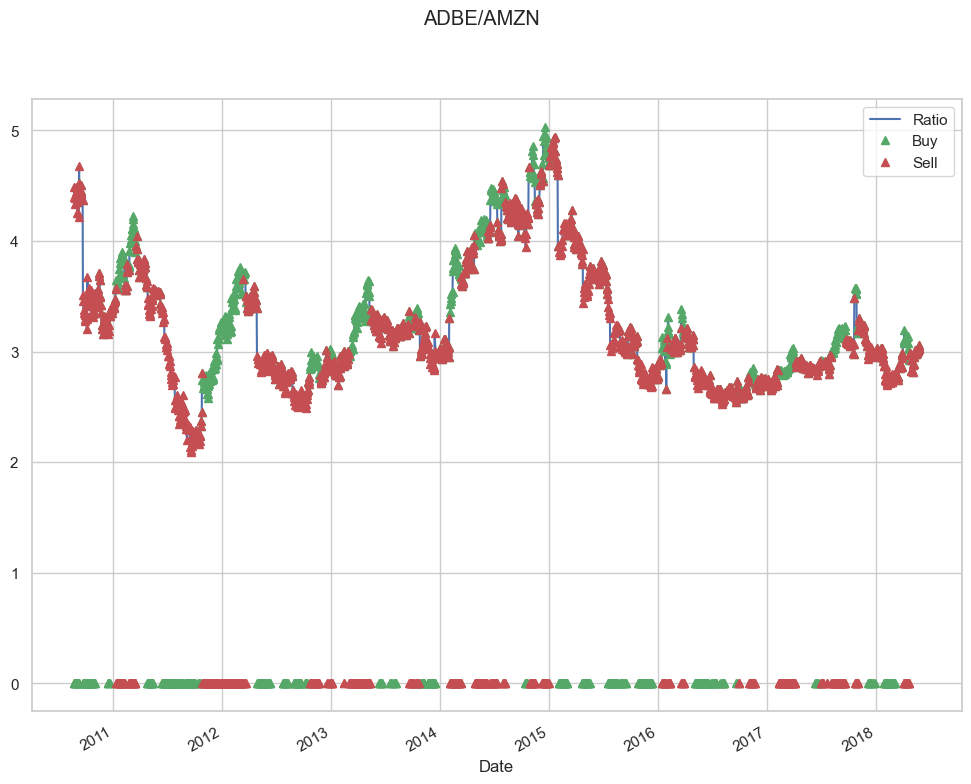

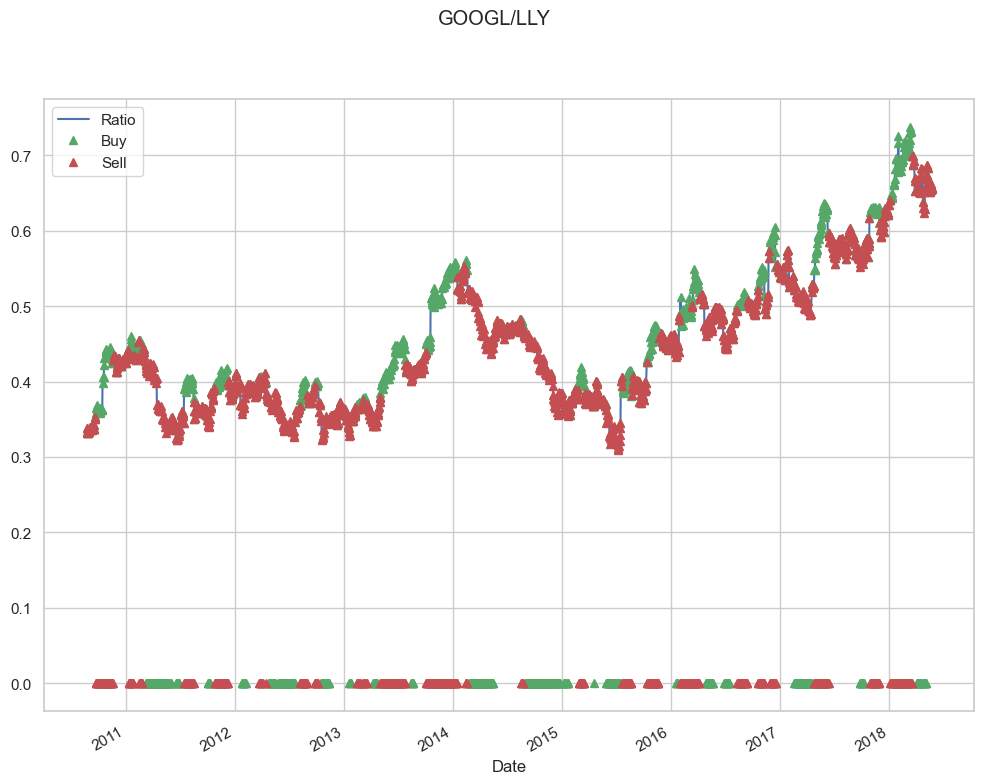

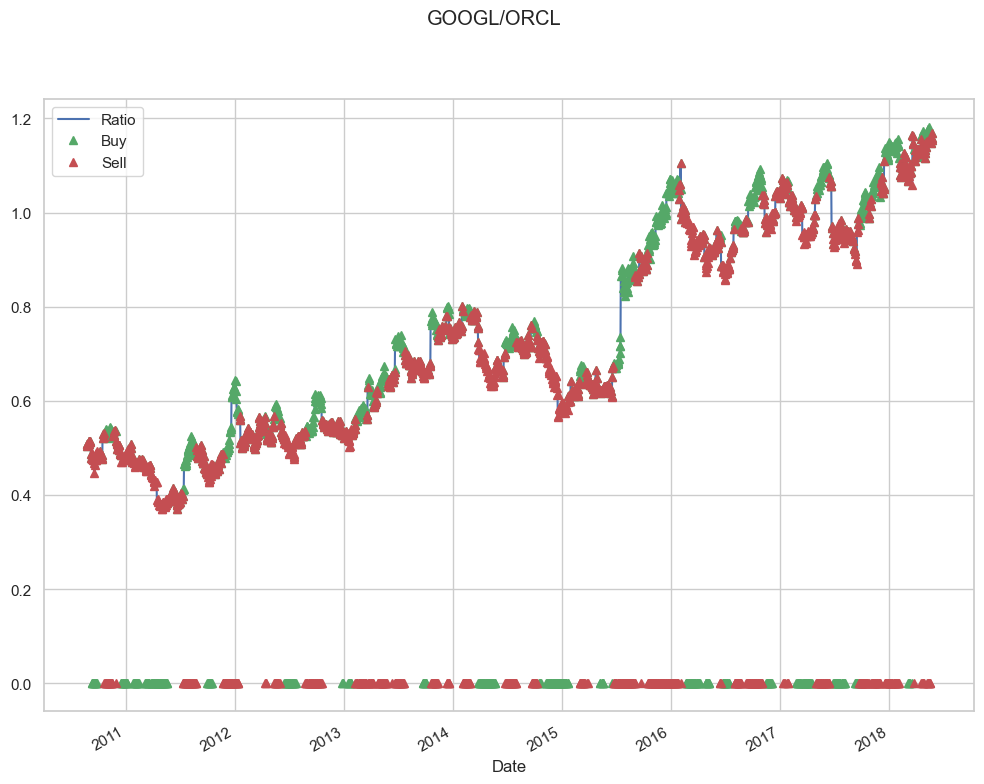

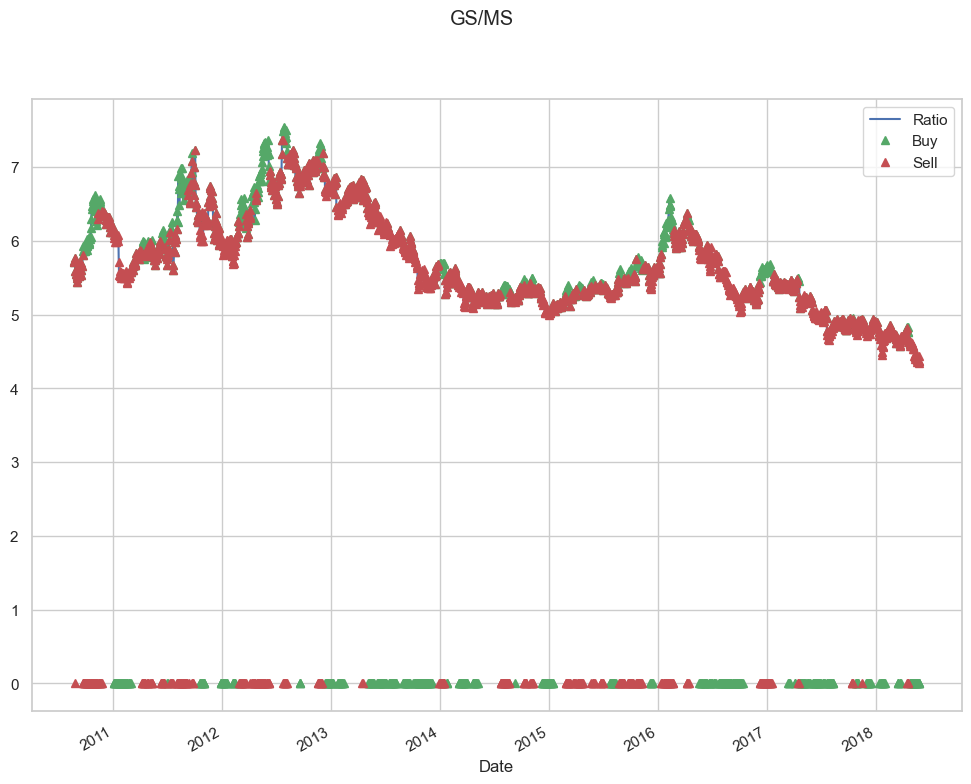

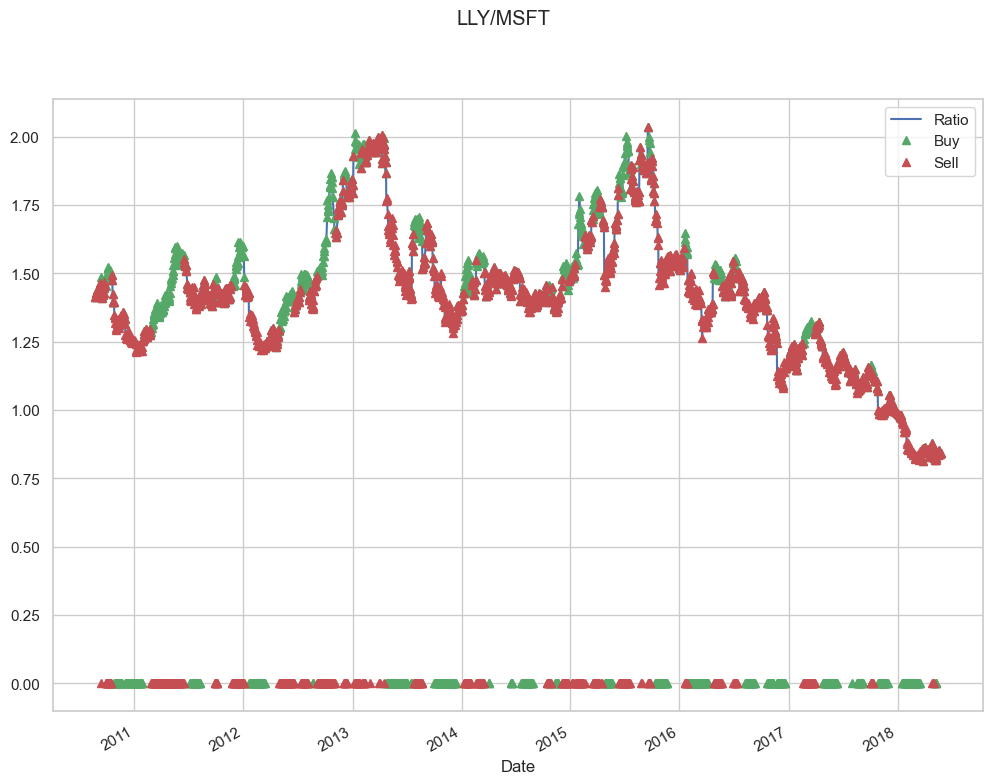

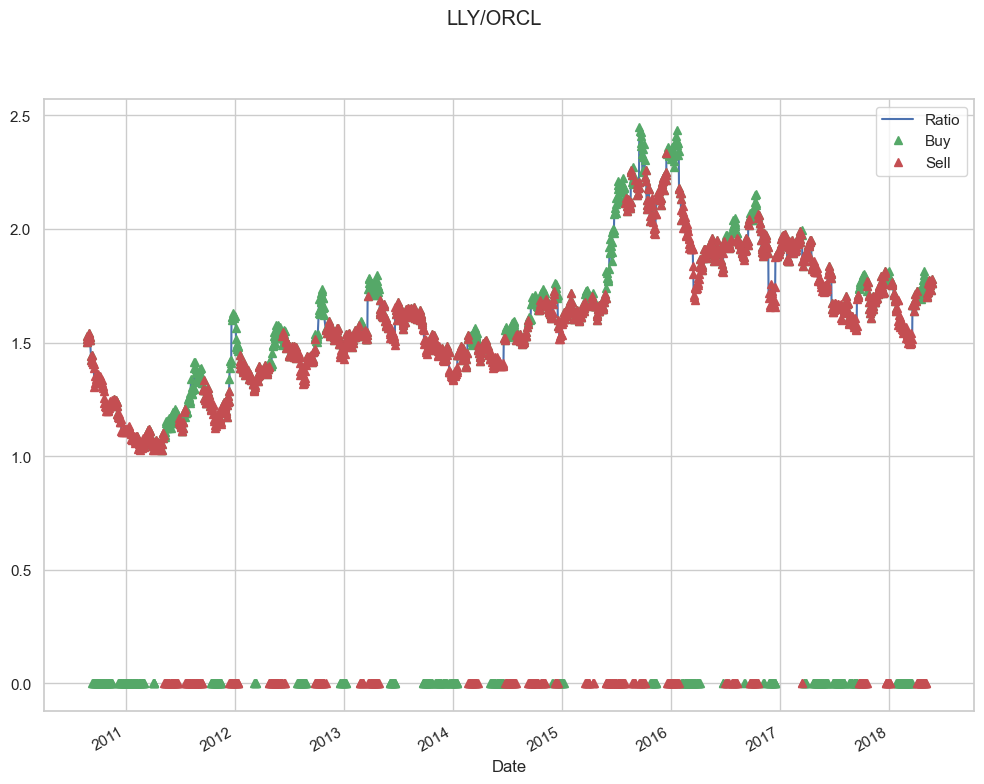

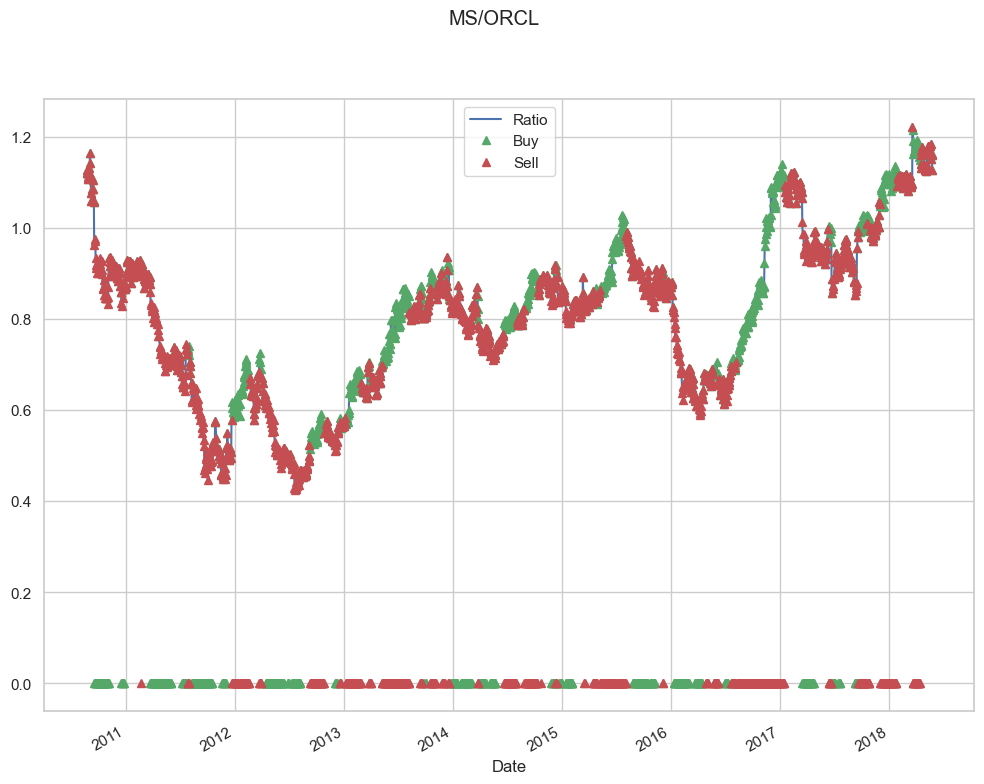

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

for ticker1, ticker2 in pairs:

  # Extract prices
  prices1 = df[ticker1]  
  prices2 = df[ticker2]

  # Calculate ratio
  ratios = prices1 / prices2

  # Split into train/test
  split_idx = int(len(ratios) * 0.7)
  train = ratios[:split_idx]
  test = ratios[split_idx:]

  # Calculate z-scores
  mavg5 = train.rolling(5).mean()
  mavg60 = train.rolling(60).mean()
  stddev = train.rolling(60).std()
  zscore = (mavg5 - mavg60) / stddev

  # Generate buy/sell signals
  buy = train.copy()
  sell = train.copy()
  
  buy[zscore<-1] = 0 
  sell[zscore>1] = 0

  # Plot
  plt.figure(figsize=(12,9))

  train[160:].plot()

  buy[160:].plot(marker='^', ls='none', c='g')
  sell[160:].plot(marker='^', ls='none', c='r')

  plt.legend(['Ratio','Buy','Sell'])
  plt.suptitle(f'{ticker1}/{ticker2}')
  plt.show()

In [81]:
# Trade using a simple strategy
def trade(S1, S2, window1, window2):
    
    # If window length is 0, algorithm doesn't make sense, so exit
    if (window1 == 0) or (window2 == 0):
        return 0
    
    # Compute rolling mean and rolling standard deviation
    ratios = S1/S2
    ma1 = ratios.rolling(window=window1,
                               center=False).mean()
    ma2 = ratios.rolling(window=window2,
                               center=False).mean()
    std = ratios.rolling(window=window2,
                        center=False).std()
    zscore = (ma1 - ma2)/std
    
    # Simulate trading
    # Start with no money and no positions
    money = 0
    countS1 = 0
    countS2 = 0
    for i in range(len(ratios)):
        # Sell short if the z-score is > 1
        if zscore[i] < -1:
            money += S1[i] - S2[i] * ratios[i]
            countS1 -= 1
            countS2 += ratios[i]
            #print('Selling Ratio %s %s %s %s'%(money, ratios[i], countS1,countS2))
        # Buy long if the z-score is < -1
        elif zscore[i] > 1:
            money -= S1[i] - S2[i] * ratios[i]
            countS1 += 1
            countS2 -= ratios[i]
            #print('Buying Ratio %s %s %s %s'%(money,ratios[i], countS1,countS2))
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscore[i]) < 0.75:
            money += S1[i] * countS1 + S2[i] * countS2
            countS1 = 0
            countS2 = 0
            #print('Exit pos %s %s %s %s'%(money,ratios[i], countS1,countS2))
            
            
    return money

In [83]:
trade(df['ADBE'].iloc[val:], df['AMZN'].iloc[val:], 60, 5)

7394.875380356055

In [93]:
def trade(prices1, prices2, ticker1, ticker2, window1, window2):

  ratios = prices1/prices2
  
  # Calculate z-scores
  ma1 = ratios.rolling(window1).mean()
  ma2 = ratios.rolling(window2).mean() 
  std = ratios.rolling(window2).std()
  zscore = (ma1 - ma2)/std

  # Initialize
  money = 0
  count1 = 0 
  count2 = 0

  # Simulate trading
  for i in range(len(ratios)):
    
    # Sell logic
    if zscore[i] < -1:
      money += prices1[i] - prices2[i] * ratios[i]  
      count1 -= 1
      count2 += ratios[i]

    # Buy logic
    elif zscore[i] > 1:
      money -= prices1[i] - prices2[i] * ratios[i]
      count1 += 1
      count2 -= ratios[i]

    # Clear positions
    elif abs(zscore[i]) < 0.75:
      money += prices1[i] * count1 + prices2[i] * count2
      count1 = 0
      count2 = 0

  print(f"{ticker1}/{ticker2}: ${money:,.2f}")
 
  
# Example usage  
trade(df['AAPL'], df['MSFT'], 'AAPL', 'MSFT', 60, 5)

AAPL/MSFT: $605.11


In [97]:
profits = {}
for ticker1, ticker2 in pairs:

  prices1 = df[ticker1]  
  prices2 = df[ticker2]

  profit = trade(prices1, prices2, ticker1, ticker2, 60, 5)
  
  # Save the profit for this pair
  profits[(ticker1, ticker2)] = profit


for ticker1, ticker2 in pairs:
  print(f"{ticker1}/{ticker2}: ${profits[(ticker1, ticker2)]:,.2f}")

AAPL/LLY: $-577.92
ADBE/AMZN: $7,394.88
GOOGL/LLY: $2,422.96
GOOGL/ORCL: $2,458.85
GS/MS: $3,946.80
LLY/MSFT: $1,731.04
LLY/ORCL: $6,122.52
MS/ORCL: $149.21


TypeError: unsupported format string passed to NoneType.__format__